# Assignment 4

## Introduction to notebook

Professor Chris Brooks ("Client" or "client") has increased his exercise over the summer of 2019 and started collecting data on what he was doing. Throughout the summer he bought a variety of devices (heart rate monitor, watch, bicycle, etc.), and began publishing this data to the social sharing site strava. <br>

**Rule 1: Tell a story for an audience** <br>
Rule 1 emphasise the importance of using explanatory text to tell a compelling story that has (1) a beginning that introduces the topic, (2) a middle that describes your steps, and (3) an end that interprets the results.

This paper will be broken into 4 parts. Flow of analysis will be as follows: (1) Understanding and cleaning of data which show the data wangling process, (2) Analysis and presentation of Run and Cycle Workouts, (3) Power, Cadence, Heart rate Analysis, (4) Conclusion. 

The goal of this published paper is to achieve the following: 

1. Tell a compelling computational narrative, judged in part by Rule et al’s ten rules for computational analyses, 

2. Demonstrate a solid grasp of at least three of the basic visual analysis techniques (scatter, box, line, violin, histograms, heatmaps, probability plots, treemaps, sploms) which are appropriate for the analysis/data,

3. Demonstrate at least one of the more advanced visual analysis techniques in the class, I will using SPLOM, and lastly

4. Provide an interesting and defensible analysis. Visualization of data should help Professor Brooks understand what data means. 

**Rule 3: Use cell divisions to make steps clear** <br> I have adhered to Rule 3 making each cell of the notebook a meaningful one that is easy to understand (1) from the code or (2) labelling the cells with mark down / commentary above the code cell.  Each code cell has a purpose to accomplish the task of creating one visualization. They are kept short to avoid messiness in reading. 

## 1. Understanding and cleaning the data 
**Rule 2: Document the process, not just the results** <br>
It is important to document all the explorations, even those which leads to deadends. <br>
At the start, it is always important to appreciate and understand the data before performing the analysis. I have documented the data wrangling process. In a step-by-step manner, readers would be able to grasp the variations in different implementations. 


In [1]:
## Importing the usual suspects
import seaborn as sns
import numpy as np
import pandas as pd

#Matplotlib library
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# For date time conversion
import time
from datetime import datetime, timedelta
import pickle
import folium

#From Plotly
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
## reading the file, putting into df
uncleanfit_df = pd.read_csv('strava.csv')

In [3]:
## Splitting up timestamp into date, day of week, this will help in analysis later
uncleanfit_df['timestamp'] = pd.to_datetime(uncleanfit_df['timestamp'])

uncleanfit_df['start_time'] = pd.to_datetime(uncleanfit_df['timestamp']).dt.time

uncleanfit_df['date'] = pd.to_datetime(uncleanfit_df['timestamp']).dt.date

uncleanfit_df['day_of_week'] = pd.to_datetime(uncleanfit_df['timestamp']).dt.day_name()

## Converting m to km
uncleanfit_df['distance_km'] = uncleanfit_df['distance']/1e3

uncleanfit_df.head(5)

Air Power  Cadence  Form Power  Ground Time  Leg Spring Stiffness  Power  \
0        NaN      NaN         NaN          NaN                   NaN    NaN   
1        NaN      NaN         NaN          NaN                   NaN    NaN   
2        NaN      NaN         NaN          NaN                   NaN    NaN   
3        NaN      NaN         NaN          NaN                   NaN    NaN   
4        NaN      NaN         NaN          NaN                   NaN    NaN   

   Vertical Oscillation  altitude  cadence                      datafile  ...  \
0                   NaN       NaN      0.0  activities/2675855419.fit.gz  ...   
1                   NaN       NaN      0.0  activities/2675855419.fit.gz  ...   
2                   NaN       NaN     54.0  activities/2675855419.fit.gz  ...   
3                   NaN    3747.0     77.0  activities/2675855419.fit.gz  ...   
4                   NaN    3798.0     77.0  activities/2675855419.fit.gz  ...   

   position_long   speed           timestamp  unknown_87  unknown_88  \
0            NaN     0.0 2019-07-08 21:04:03         0.0       300.0   
1            NaN     0.0 2019-07-08 21:04:04         0.0       300.0   
2            NaN  1316.0 2019-07-08 21:04:07         0.0       300.0   
3   -999063637.0  1866.0 2019-07-08 21:04:14         0.0       100.0   
4   -999064534.0  1894.0 2019-07-08 21:04:15         0.0       100.0   

   unknown_90  start_time        date day_of_week  distance_km  
0         NaN    21:04:03  2019-07-08      Monday      0.00000  
1         NaN    21:04:04  2019-07-08      Monday      0.00000  
2         NaN    21:04:07  2019-07-08      Monday      0.00132  
3         NaN    21:04:14  2019-07-08      Monday      0.01219  
4         NaN    21:04:15  2019-07-08      Monday      0.01408  

[5 rows x 26 columns]

In [4]:
## Looking at how the data looks like for each column
uncleanfit_df.describe()

Air Power       Cadence    Form Power   Ground Time  \
count  17842.000000  17847.000000  17842.000000  17847.000000   
mean       1.872100     77.726565     99.485932    325.934107   
std        2.777476      9.202077     13.866222     71.773687   
min        0.000000      0.000000      0.000000      0.000000   
25%        1.000000     78.000000     97.000000    308.000000   
50%        1.000000     79.000000    101.000000    326.000000   
75%        2.000000     80.000000    105.000000    340.000000   
max       48.000000     88.000000    125.000000   1732.000000   

       Leg Spring Stiffness         Power  Vertical Oscillation      altitude  \
count          17842.000000  17847.000000          17847.000000  14905.000000   
mean              13.138571    301.459797              6.458074   3846.184368   
std                2.039567     48.540552              1.135497    134.262498   
min                0.000000      0.000000              0.000000   3555.000000   
25%               13.000000    283.000000              6.125000   3768.000000   
50%               13.375000    303.000000              6.500000   3829.000000   
75%               13.750000    326.000000              7.000000   3912.000000   
max               16.875000    462.000000             12.500000   5043.000000   

            cadence      distance  ...  enhanced_speed  fractional_cadence  \
count  40627.000000  40649.000000  ...    40639.000000        40627.000000   
mean      72.781254   4097.140051  ...        3.037084            0.070138   
std       17.743728   5827.964663  ...        1.959805            0.173639   
min        0.000000      0.000000  ...        0.000000            0.000000   
25%       74.000000   1117.970000  ...        2.109000            0.000000   
50%       78.000000   2430.500000  ...        2.445000            0.000000   
75%       80.000000   4403.730000  ...        2.809000            0.000000   
max      118.000000  39007.120000  ...       15.349000            0.500000   

         heart_rate  position_lat  position_long         speed  unknown_87  \
count  38355.000000  4.045700e+04   4.045700e+04  14928.000000     40627.0   
mean     134.680094  5.045408e+08  -9.995175e+08   2067.483856         0.0   
std       18.713782  1.690905e+05   1.376341e+06    527.173476         0.0   
min       56.000000  5.039868e+08  -1.005696e+09      0.000000         0.0   
25%      121.000000  5.044397e+08  -9.993986e+08   1782.000000         0.0   
50%      136.000000  5.045116e+08  -9.992608e+08   2071.000000         0.0   
75%      148.000000  5.046159e+08  -9.990579e+08   2370.000000         0.0   
max      183.000000  5.089272e+08  -9.921938e+08   7744.000000         0.0   

         unknown_88    unknown_90   distance_km  
count  38355.000000  18618.000000  40649.000000  
mean     298.513883     -1.067354      4.097140  
std       17.176218      2.820492      5.827965  
min      100.000000    -13.000000      0.000000  
25%      300.000000     -3.000000      1.117970  
50%      300.000000      0.000000      2.430500  
75%      300.000000      0.000000      4.403730  
max      300.000000      6.000000     39.007120  

[8 rows x 21 columns]

Matplotlib was used to provide me a high level overview on the various columns we have in the strava data provided to us. 

I will now do up some quick charts to see data trends for each variable. 

The two quick charts to study the data provided to us as follows:

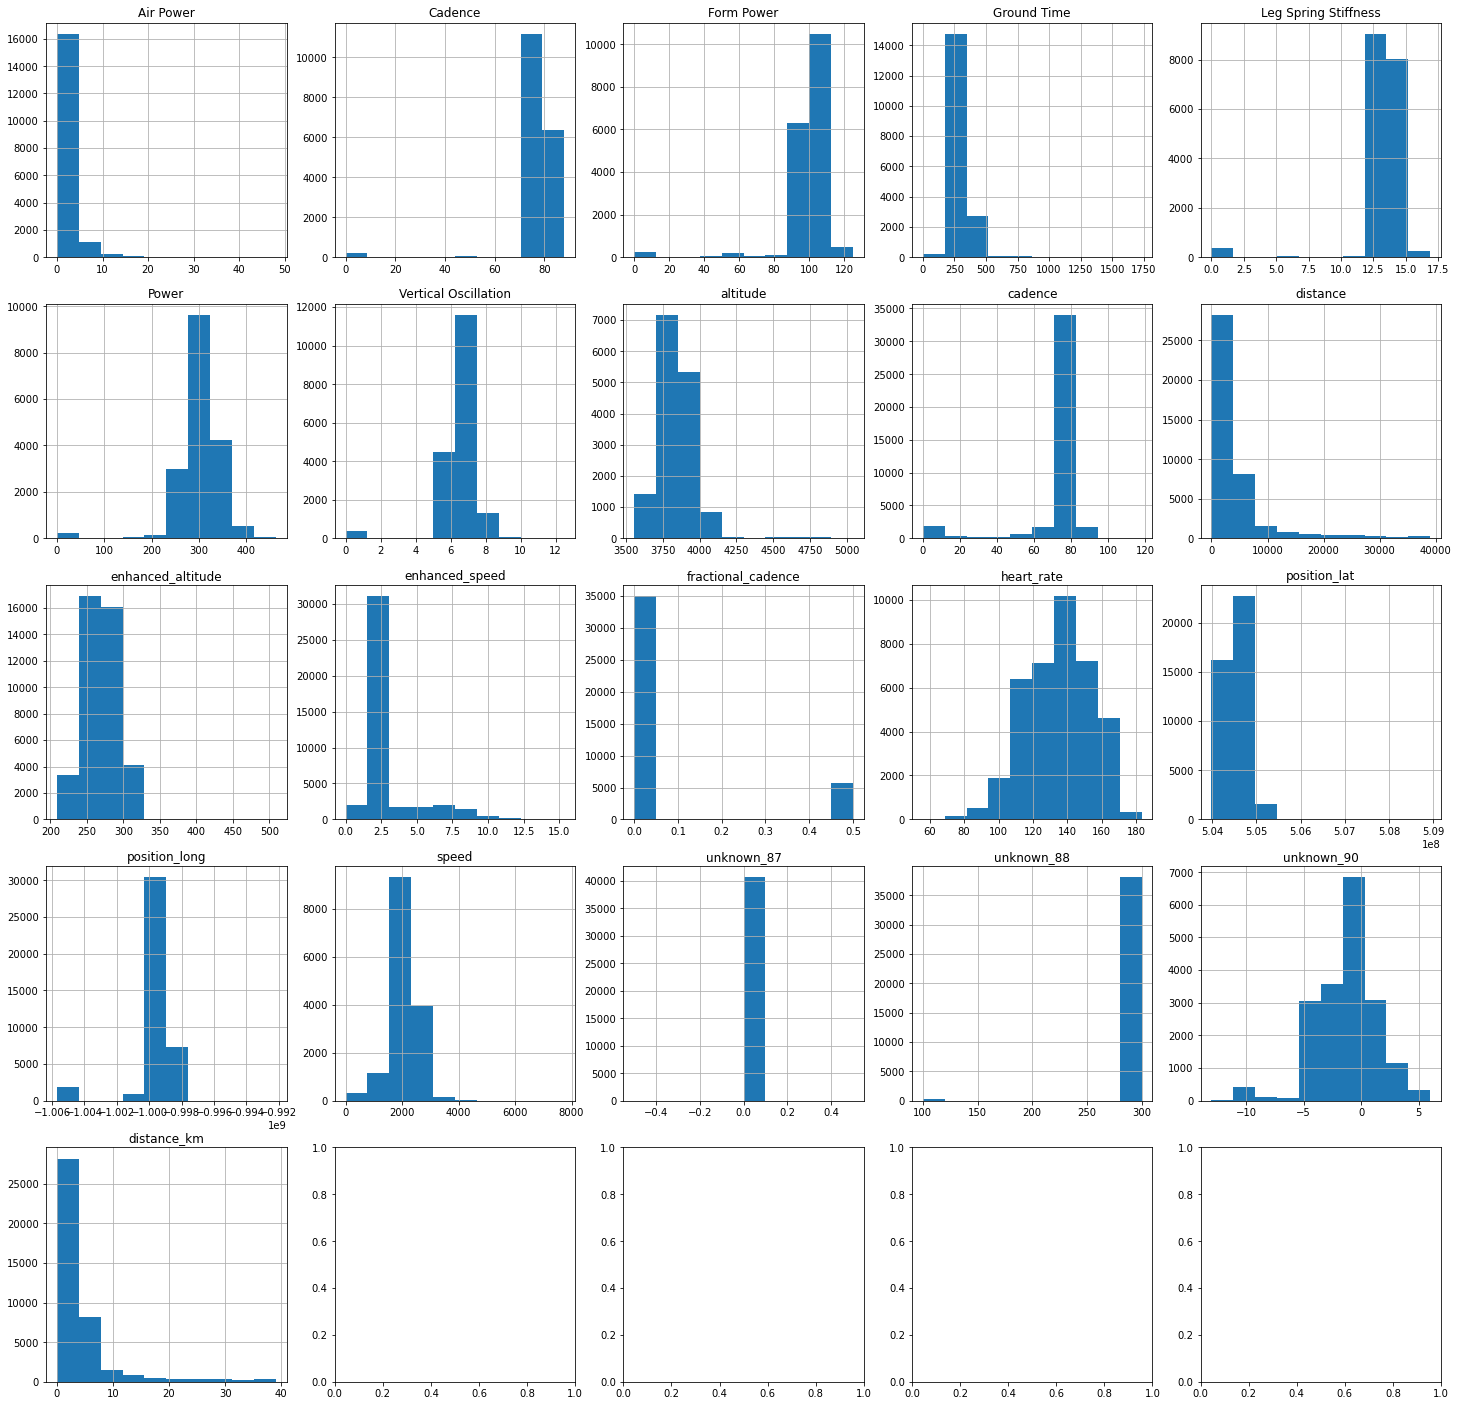

In [5]:
fig, m_axs = plt.subplots(5, 5, figsize=(25, 25))
for c_ax, c_col in zip(m_axs.flatten(), uncleanfit_df.select_dtypes(['float', 'int']).columns):
    uncleanfit_df[c_col].hist(ax=c_ax)
    c_ax.set_title(c_col)

Another way to understand the data is to analyse the correlation between the different fields namely - 

1) Speed
2) Heart rate
3) Cadence
4) Power

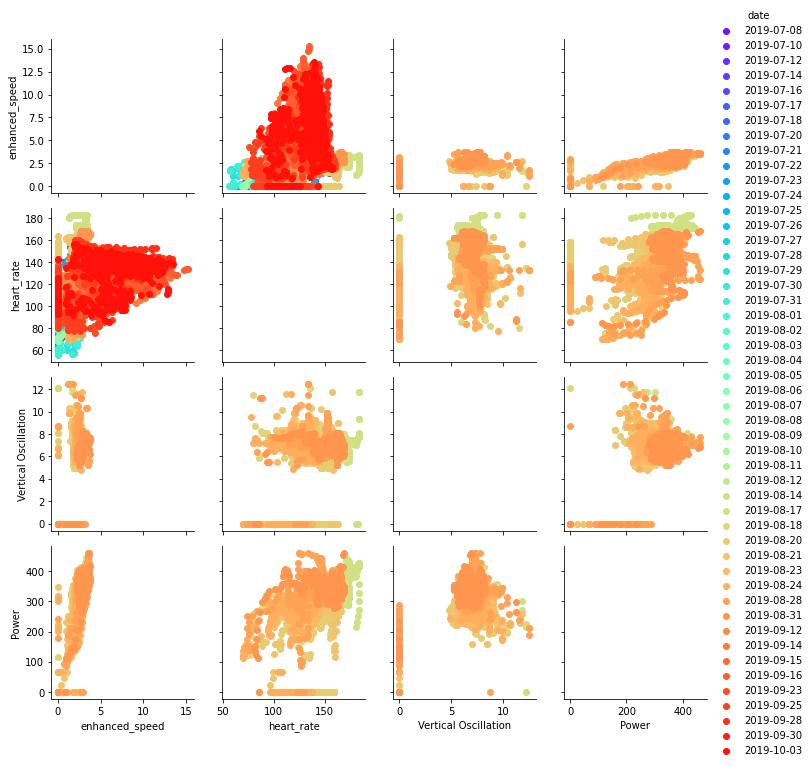

In [6]:
bydate_df = uncleanfit_df[['date','enhanced_speed','heart_rate','Vertical Oscillation','Power']]
g = sns.PairGrid(bydate_df, palette='rainbow', hue='date')
g.map_offdiag(plt.scatter)
g.add_legend();

From the above observation of correlation between the different fields, I am interested to find out the following relations:

1) Heart rate vs Speed
2) Heart rate vs Power
3) Power vs Speed / Cadence

To keep things simple, I will drop unwanted columns. 

To decide between enhanced speed and speed, I will keep enhanced speed since enhanced speed captures all values, while speed stops recording values after a date. So in my opinion, enhanced_speed should be used throughout.


In [7]:
## Columns to drop. 
uncleanfit_df.drop(['speed'], axis=1)

## df.to_csv('file_name.csv')
#uncleanfit_df = uncleanfit_df.rename(columns={"distance": "distance(m)", "enhanced_speed": "speed(ms)"})
##uncleanfit_df.drop(['unknown_90', 'unknown_87'], axis=1)

Air Power  Cadence  Form Power  Ground Time  Leg Spring Stiffness  \
0            NaN      NaN         NaN          NaN                   NaN   
1            NaN      NaN         NaN          NaN                   NaN   
2            NaN      NaN         NaN          NaN                   NaN   
3            NaN      NaN         NaN          NaN                   NaN   
4            NaN      NaN         NaN          NaN                   NaN   
...          ...      ...         ...          ...                   ...   
40644        NaN      NaN         NaN          NaN                   NaN   
40645        NaN      NaN         NaN          NaN                   NaN   
40646        NaN      NaN         NaN          NaN                   NaN   
40647        NaN      NaN         NaN          NaN                   NaN   
40648        NaN      NaN         NaN          NaN                   NaN   

       Power  Vertical Oscillation  altitude  cadence  \
0        NaN                   NaN       NaN      0.0   
1        NaN                   NaN       NaN      0.0   
2        NaN                   NaN       NaN     54.0   
3        NaN                   NaN    3747.0     77.0   
4        NaN                   NaN    3798.0     77.0   
...      ...                   ...       ...      ...   
40644    NaN                   NaN       NaN     62.0   
40645    NaN                   NaN       NaN     62.0   
40646    NaN                   NaN       NaN     62.0   
40647    NaN                   NaN       NaN     23.0   
40648    NaN                   NaN       NaN     22.0   

                           datafile  ...  position_lat  position_long  \
0      activities/2675855419.fit.gz  ...           NaN            NaN   
1      activities/2675855419.fit.gz  ...           NaN            NaN   
2      activities/2675855419.fit.gz  ...           NaN            NaN   
3      activities/2675855419.fit.gz  ...   504432050.0   -999063637.0   
4      activities/2675855419.fit.gz  ...   504432492.0   -999064534.0   
...                             ...  ...           ...            ...   
40644  activities/2925939753.fit.gz  ...   504554553.0   -999308618.0   
40645  activities/2925939753.fit.gz  ...   504553919.0   -999309466.0   
40646  activities/2925939753.fit.gz  ...   504553588.0   -999309432.0   
40647  activities/2925939753.fit.gz  ...   504552459.0   -999308808.0   
40648  activities/2925939753.fit.gz  ...   504552222.0   -999308613.0   

                timestamp  unknown_87  unknown_88  unknown_90  start_time  \
0     2019-07-08 21:04:03         0.0       300.0         NaN    21:04:03   
1     2019-07-08 21:04:04         0.0       300.0         NaN    21:04:04   
2     2019-07-08 21:04:07         0.0       300.0         NaN    21:04:07   
3     2019-07-08 21:04:14         0.0       100.0         NaN    21:04:14   
4     2019-07-08 21:04:15         0.0       100.0         NaN    21:04:15   
...                   ...         ...         ...         ...         ...   
40644 2019-10-03 23:04:54         0.0       300.0         NaN    23:04:54   
40645 2019-10-03 23:04:56         0.0       300.0         NaN    23:04:56   
40646 2019-10-03 23:04:57         0.0       300.0         NaN    23:04:57   
40647 2019-10-03 23:05:02         0.0       300.0         NaN    23:05:02   
40648 2019-10-03 23:05:05         0.0       300.0         NaN    23:05:05   

             date  day_of_week  distance_km  
0      2019-07-08       Monday      0.00000  
1      2019-07-08       Monday      0.00000  
2      2019-07-08       Monday      0.00132  
3      2019-07-08       Monday      0.01219  
4      2019-07-08       Monday      0.01408  
...           ...          ...          ...  
40644  2019-10-03     Thursday     38.62730  
40645  2019-10-03     Thursday     38.63565  
40646  2019-10-03     Thursday     38.63863  
40647  2019-10-03     Thursday     38.64999  
40648  2019-10-03     Thursday     38.65259  

[40649 rows x 25 columns]

Adding on additional columns, this will help with the analysis and chart creation.

In [8]:
## Getting the max value
distance_date = uncleanfit_df.groupby('date').max()
## Getting the mean value
distance_date_type2 = uncleanfit_df.groupby('date').mean()

## Creation, cleaning up of columns
distance_date['top_speed'] = distance_date["enhanced_speed"] # calculation of max / top speed
distance_date['time_taken(min)'] = distance_date["distance"] / distance_date["enhanced_speed"]/60 # To find total time
distance_date['ave_speed'] = distance_date_type2["enhanced_speed"] # calculate the average speed per activity
distance_date.rename(columns={'heart_rate': 'max_HR'}, inplace=True) # Maximum heart rate
distance_date['HR'] = distance_date_type2['heart_rate'] # Average heart rate

distance_date = distance_date.reset_index()
distance_date.head()

# to see the data via CSV
distance_date_type2.to_csv('distance_date_type2.csv')
distance_date.to_csv('distance_date_.csv') 


Now that we done some basic analysis on the dataset, we know that each line should be tagged to a workout type. <br>
To analyse data by workout type, It is important to allocate the data to two buckets namely (1) Running, (2) Cycling. <br>

This is somewhat subjective, for our purpose I determine the activity type as follows based on speed: <br>
(1) Running defined as speed between 1 m/s to 7.5m/s <br>
(2) Cycling defined as speed above 7.5m/s 

In [9]:
distance_date["workout_type"] = distance_date["top_speed"]

# Create a new column with an activity defined by a larger or smaller value
distance_date["workout_type"] = np.where(distance_date['workout_type'] <=7.5, 1,distance_date['workout_type'] )

distance_date["workout_type"] = np.where(distance_date['workout_type'] >7.5, 2,distance_date['workout_type'] )

ex_df= distance_date.replace({'workout_type':{1:"Run", 2:"Cycle"}})

ex_df.to_csv('ex_df.csv')

Let's look at some specifics of data

In [10]:
ex_df.nlargest(5,'top_speed')

date  Air Power  Cadence  Form Power  Ground Time  \
42  2019-09-15        NaN      NaN         NaN          NaN   
43  2019-09-16        NaN      NaN         NaN          NaN   
47  2019-09-30        NaN      NaN         NaN          NaN   
48  2019-10-03        NaN      NaN         NaN          NaN   
45  2019-09-25        NaN      NaN         NaN          NaN   

    Leg Spring Stiffness  Power  Vertical Oscillation  altitude  cadence  ...  \
42                   NaN    NaN                   NaN       NaN     95.0  ...   
43                   NaN    NaN                   NaN       NaN    100.0  ...   
47                   NaN    NaN                   NaN       NaN    118.0  ...   
48                   NaN    NaN                   NaN       NaN    116.0  ...   
45                   NaN    NaN                   NaN       NaN     89.0  ...   

   unknown_88  unknown_90  start_time  day_of_week  distance_km  top_speed  \
42        NaN         NaN    22:24:19       Sunday      7.34634     15.349   
43      300.0         NaN    21:59:45       Monday     28.57743     15.237   
47        NaN         NaN    23:04:02       Monday     39.00712     13.921   
48      300.0         NaN    23:05:05     Thursday     38.65259     13.511   
45      300.0         NaN    22:29:29    Wednesday     15.60688     13.362   

    time_taken(min)  ave_speed          HR workout_type  
42         7.977002   5.543096         NaN        Cycle  
43        31.258811   6.365662  125.924547        Cycle  
47        46.700572   6.547386         NaN        Cycle  
48        47.680396   6.592298  135.955556        Cycle  
45        19.466746   5.510255  132.779221        Cycle  

[5 rows x 31 columns]

In [11]:
ex_df.nsmallest(5,'top_speed')

date  Air Power  Cadence  Form Power  Ground Time  \
16  2019-07-29        NaN      NaN         NaN          NaN   
12  2019-07-25        NaN      NaN         NaN          NaN   
26  2019-08-08        NaN      NaN         NaN          NaN   
18  2019-07-31        NaN      NaN         NaN          NaN   
13  2019-07-26        NaN      NaN         NaN          NaN   

    Leg Spring Stiffness  Power  Vertical Oscillation  altitude  cadence  ...  \
16                   NaN    NaN                   NaN    4044.0     79.0  ...   
12                   NaN    NaN                   NaN    3887.0     90.0  ...   
26                   NaN    NaN                   NaN    3941.0     83.0  ...   
18                   NaN    NaN                   NaN    3929.0     82.0  ...   
13                   NaN    NaN                   NaN    4019.0     80.0  ...   

   unknown_88  unknown_90  start_time  day_of_week  distance_km  top_speed  \
16      300.0         NaN    12:23:19       Monday      3.67115      1.997   
12      300.0         NaN    00:13:11     Thursday      1.91486      2.025   
26      300.0        -2.0    00:35:42     Thursday      3.48500      2.099   
18      300.0         NaN    23:22:24    Wednesday      2.70555      2.613   
13      300.0         0.0    21:35:38       Friday     10.08415      2.650   

    time_taken(min)  ave_speed          HR workout_type  
16        30.638875   1.676036   99.187675          Run  
12        15.760165   1.867573  110.631373          Run  
26        27.671907   1.719548  135.746736          Run  
18        17.256984   2.023512  108.972424          Run  
13        63.422327   1.954672  117.933005          Run  

[5 rows x 31 columns]

It will be interesting to find out the number of times our client ran as compared to cycle during the period 08 Jul - 03 Oct 19.

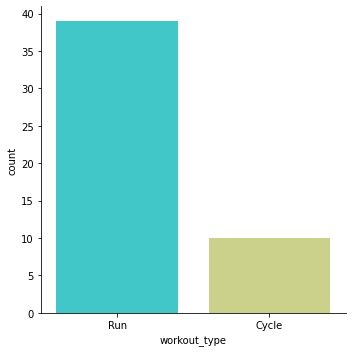

In [12]:
sns.catplot(x='workout_type', kind='count', data=ex_df, palette = 'rainbow');

I feel the data paints a better story and the reader will better appreciate the data and analysis if we can understand the workout type from a 'day of week' point of view.

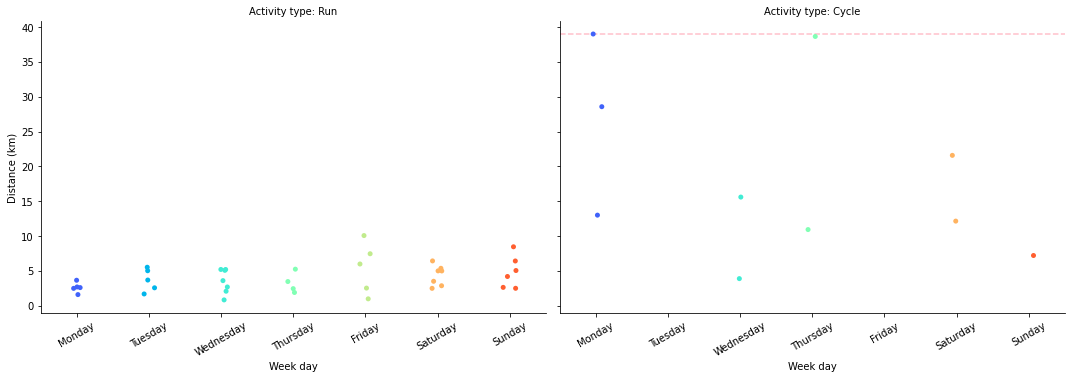

In [13]:
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

g = sns.catplot(x='day_of_week', y='distance_km', kind='strip', data=ex_df, 
                order=day_of_week_order, col='workout_type', height=5, aspect=1.5,
                palette='rainbow')

(g.set_axis_labels("Week day", "Distance (km)")
  .set_titles("Activity type: {col_name}")
  .set_xticklabels(rotation=30))

plt.axhline(ex_df['distance_km'].max(), linestyle='--', color = 'pink', zorder=0)


Observations: <br>

Chris leads a healthy lifestyle. he either cycle or runs everyday of the week. 

*Cycling* -
At first glance, it seems he cycled the longest distance on Monday and Wednesday. I have included a line to see if he cycled longer on Monday or Wednesday. The pink dotted line drawn help us decode that he clocked the longest cycling distance on Monday followed Wednesday. Another observation is that he seemed to clock longer cycling distances on Monday instead of other days of the week. <br>

*Running* -
He clocked most number of runs on Wednesday and Saturday at 7 times, followed by Saturday and Friday which ties at 6 times during the period - Jul to Sep 19.  

As the week progress towards the weekend, it can be observed that Client clock longer distances. He seems to be free on Fridays (no classes!) as his distance starts ramping up on Friday. Friday was also the day he clocked the longest distance as compared to other days. 


Next, I will like to have a quick overview on his run and cycle workout, correlation between the different fields - 

(1) 'HR' for Heart Rate, <br>
(2) Distance, <br>
(3) Cadence, <br>
(4) Enhanced_speed  <br> 

using seaborn as follows:

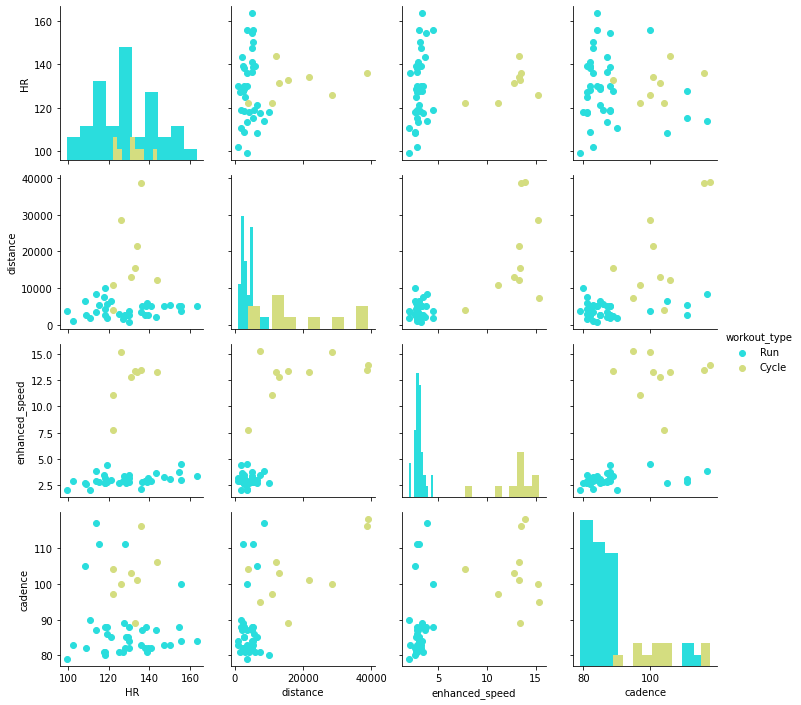

In [14]:
temp_df = ex_df[['workout_type','HR','distance','enhanced_speed', 'cadence']]

g = sns.PairGrid(temp_df, hue='workout_type', palette='rainbow')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Total cumulative distance covered by Chris from 8th Jul to 3th Oct.

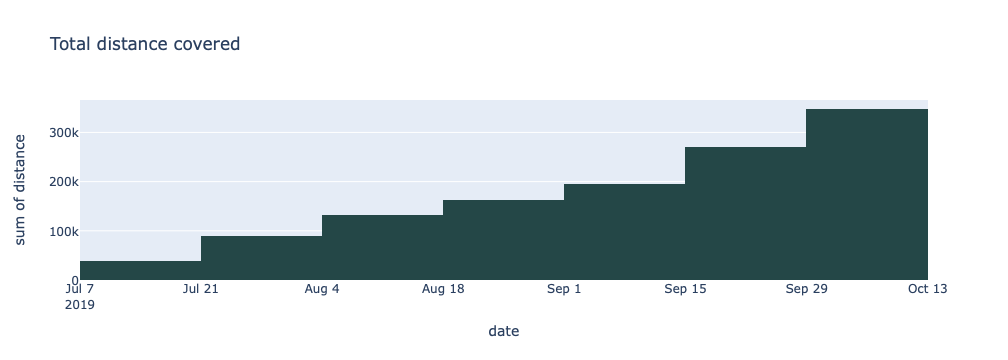

In [15]:
##fig = go.Figure(data=[go.Histogram(y=df['distance'], x = df['date'], cumulative_enabled=True)]) 
##fig.show()
px.histogram(distance_date,
            y = 'distance',
            x = 'date', 
            title = 'Total distance covered', 
            color_discrete_sequence=["#244747"],  
            cumulative = True) 


Now that we are done doing a high level review on the data we have and provided some quicl charts to show the correlation and interesting data points, we can move on to our deep dive via animation and advance charts.  

## 2. Analysis on Distance, Time, Speed


In [16]:
## Defining the run df
run_df = ex_df[ex_df.workout_type == 'Run']
run_df.reset_index()

## Defining the cycle df
cycle_df = ex_df[ex_df.workout_type == 'Cycle']
cycle_df.reset_index()

index        date  Air Power  Cadence  Form Power  Ground Time  \
0     11  2019-07-24        NaN      NaN         NaN          NaN   
1     40  2019-09-12        NaN      NaN         NaN          NaN   
2     41  2019-09-14        NaN      NaN         NaN          NaN   
3     42  2019-09-15        NaN      NaN         NaN          NaN   
4     43  2019-09-16        NaN      NaN         NaN          NaN   
5     44  2019-09-23        NaN      NaN         NaN          NaN   
6     45  2019-09-25        NaN      NaN         NaN          NaN   
7     46  2019-09-28        NaN      NaN         NaN          NaN   
8     47  2019-09-30        NaN      NaN         NaN          NaN   
9     48  2019-10-03        NaN      NaN         NaN          NaN   

   Leg Spring Stiffness  Power  Vertical Oscillation  altitude  ...  \
0                   NaN    NaN                   NaN    4036.0  ...   
1                   NaN    NaN                   NaN       NaN  ...   
2                   NaN    NaN                   NaN       NaN  ...   
3                   NaN    NaN                   NaN       NaN  ...   
4                   NaN    NaN                   NaN       NaN  ...   
5                   NaN    NaN                   NaN       NaN  ...   
6                   NaN    NaN                   NaN       NaN  ...   
7                   NaN    NaN                   NaN       NaN  ...   
8                   NaN    NaN                   NaN       NaN  ...   
9                   NaN    NaN                   NaN       NaN  ...   

   unknown_88 unknown_90  start_time  day_of_week  distance_km  top_speed  \
0       300.0        NaN    23:59:58    Wednesday      3.90454      7.744   
1       300.0        NaN    00:45:32     Thursday     10.94440     11.122   
2       300.0        NaN    21:37:39     Saturday     21.59262     13.315   
3         NaN        NaN    22:24:19       Sunday      7.34634     15.349   
4       300.0        NaN    21:59:45       Monday     28.57743     15.237   
5       300.0        NaN    21:31:09       Monday     13.01443     12.811   
6       300.0        NaN    22:29:29    Wednesday     15.60688     13.362   
7       300.0        NaN    22:20:01     Saturday     12.15782     13.268   
8         NaN        NaN    23:04:02       Monday     39.00712     13.921   
9       300.0        NaN    23:05:05     Thursday     38.65259     13.511   

   time_taken(min)  ave_speed          HR  workout_type  
0         8.403366   2.158751  122.079861         Cycle  
1        16.400527   5.010060  121.892216         Cycle  
2        27.027938   6.471152  134.121622         Cycle  
3         7.977002   5.543096         NaN         Cycle  
4        31.258811   6.365662  125.924547         Cycle  
5        16.931322   5.903938  131.168717         Cycle  
6        19.466746   5.510255  132.779221         Cycle  
7        15.272108   7.069993  143.824257         Cycle  
8        46.700572   6.547386         NaN         Cycle  
9        47.680396   6.592298  135.955556         Cycle  

[10 rows x 32 columns]

In [17]:
run_total_df = run_df.groupby('day_of_week').agg(sum)
run_total_df.reset_index()

day_of_week  Air Power  Cadence  Form Power  Ground Time  \
0      Friday        3.0     81.0       114.0        974.0   
1      Monday        0.0      0.0         0.0          0.0   
2    Saturday       60.0    253.0       358.0       3420.0   
3      Sunday       11.0     82.0       115.0       1170.0   
4    Thursday        0.0      0.0         0.0          0.0   
5     Tuesday       15.0     82.0       115.0       1254.0   
6   Wednesday       47.0    171.0       244.0       2600.0   

   Leg Spring Stiffness   Power  Vertical Oscillation  altitude  cadence  ...  \
0                15.875   351.0                 9.625   17614.0    407.0  ...   
1                 0.000     0.0                 0.000   19892.0    418.0  ...   
2                46.750  1271.0                34.625   16014.0    639.0  ...   
3                15.375   378.0                12.125   20092.0    533.0  ...   
4                 0.000     0.0                 0.000   16090.0    373.0  ...   
5                16.875   354.0                10.375   16058.0    423.0  ...   
6                31.375   871.0                24.250   19572.0    612.0  ...   

   position_long    speed  unknown_87  unknown_88  unknown_90  distance_km  \
0  -4.994986e+09  11869.0         0.0      1500.0         0.0     27.11020   
1  -4.995576e+09  14490.0         0.0      1500.0        15.0     13.11463   
2  -7.000142e+09  11700.0         0.0      2100.0         7.0     30.77016   
3  -5.993085e+09  15825.0         0.0      1800.0        11.0     29.35185   
4  -3.996201e+09  10301.0         0.0      1200.0         6.0     13.12826   
5  -4.988156e+09  12755.0         0.0      1500.0        10.0     18.56453   
6  -6.993768e+09  15984.0         0.0      2100.0         2.0     24.79512   

   top_speed  time_taken(min)  ave_speed          HR  
0     14.631       156.041190  10.514006  614.760145  
1     14.490        80.770191  10.681998  602.319671  
2     21.544       167.974768  16.617589  942.612987  
3     19.016       152.176281  13.546046  768.986904  
4     10.301        87.001912   7.686110  488.971883  
5     15.638       106.202365  11.217510  636.857891  
6     22.674       134.104620  17.062202  968.178032  

[7 rows x 26 columns]

In [18]:
## This dataframe is required for the bar chart that follows
total_run_pivot = run_df.pivot_table(index="day_of_week", aggfunc=np.sum)
total_run_pivot = pd.DataFrame(total_run_pivot)

ave_run_pivot = run_df.pivot_table(index="day_of_week", aggfunc=np.mean)
ave_run_pivot = pd.DataFrame(ave_run_pivot)

## 2a. Run Workouts ##

We will now perform a deep dive into each activity - (2a) Run followed by (2b) Cycle. I formulated a couple of questions to be answered on Chris' workouts after doing an overview of the strava data in Part 1 of my analysis: 

- is there a relationship between how far he run / cycle and his average speed? 
- Did he run/cycle slower when the distance was longer?Have my runs gotten faster over time?
- Is his max speed higher on shorter runs / cycle?
- Did his runs get faster over time?


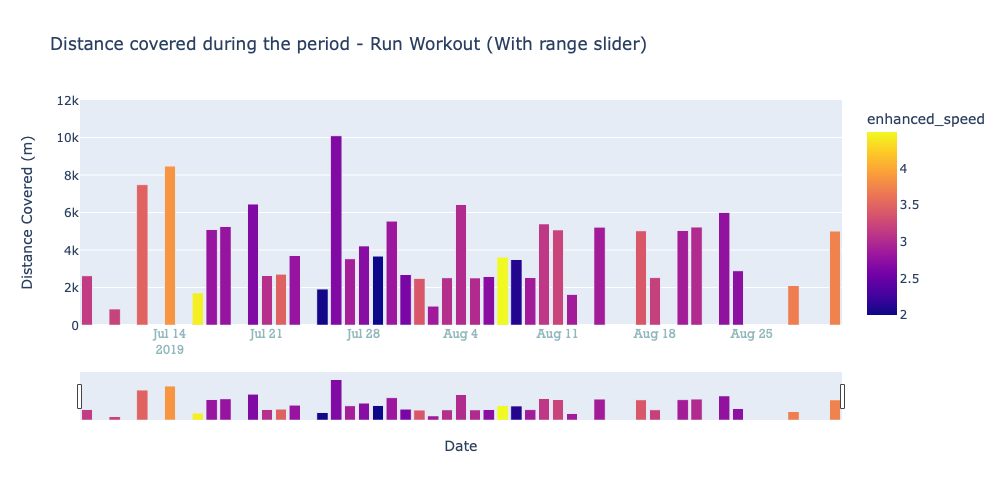

In [19]:
fig = px.bar(run_df,
            y = 'distance', # data for x
            x = 'date',  # data for y
            labels = {
                "distance": "Distance Covered (m)", # label for x
                "date": "Date", # label for y
            },  
            # text_auto='.2s',  
             
            # Set the legend display location and add style
            #legend = dict(orientation = 'h', xanchor = "center", x = 0.8, y= 1.2),             
            # Add Title
            title = 'Distance covered during the period - Run Workout (With range slider)', 
            color = 'enhanced_speed',
            barmode='relative', 
            ##animation_group="distance", 
            ##animation_frame="day_of_week", 
             
            # size of hart
            height = 500, 
            width = 1000,
            ## color_discrete_Sequence changes the line color
            color_discrete_sequence=["#244747"],    
                        
            )
## changing axis tickmarks
fig.update_yaxes(range=[0.0, 12000.0])

## To change font type, size, color of axis 
fig.update_xaxes(tickangle=0, tickfont=dict(
                               family='Rockwell', 
                               color='#91b8bd', 
                               size=12)) 

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


# Added on a range slider to show 
fig.update_xaxes(rangeslider_visible=True)

fig.show()

### change bar color



I have included a range slider as it gives the end user an option to select a value within a configured range by dragging the slider.

From the above chart, we can decode that he ran the longest distance on 26 Jul 19, total of 10km covered with speed of 2.65m/s. 

let us look at which day of the week he runs most. 


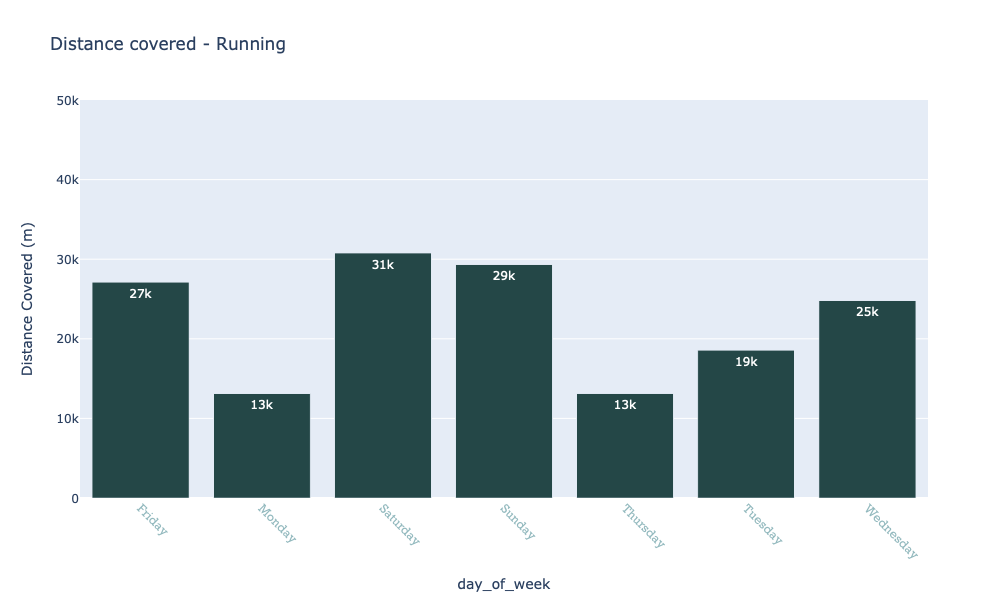

In [20]:
fig = px.bar(total_run_pivot,
            y = 'distance', 
            ##x = 'day_of_week',
    
                         
            labels = {
                "distance": "Distance Covered (m)"
            },  
            text_auto='.2s',  
            title = 'Distance covered - Running', 
            ## color = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color
            color_discrete_sequence=["#244747"]              
            )

fig.update_yaxes(range=[0.0, 50000.0])

## To change font type, size, color of axis 
fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#91b8bd', 
                               size=12)) 

fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

fig.show()

We can decode from the above chart that during the review period, our client clocked the most distance on Saturday, total of 31KM followed by Sunday - 29KM. 

I will now use Seaborn to create the following plots which will depict the relationships between his (1) top speed against distance and (2) max speed against distance. 

Text(0.5, 1.0, 'Average Speed vs Distance - Run')

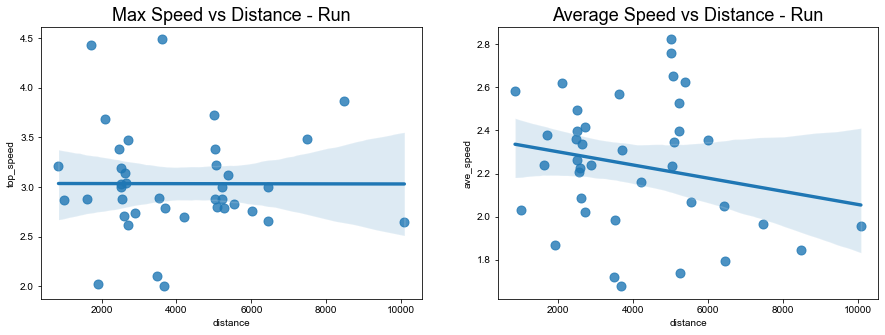

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[0], x='distance', y = 'top_speed', data = run_df).set_title("Max Speed vs Distance - Run")

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[1], x='distance', y = 'ave_speed', data = run_df).set_title("Average Speed vs Distance - Run")

I can decode from the above chart to client that his maximum speed during the duration for all run average out to be around 3m/s. <br>   

From this chart I can decode that our client's average speed decreases as the distance increases. This make sense from an athlete point of view whereby speed decreases as distance of the run increases. 

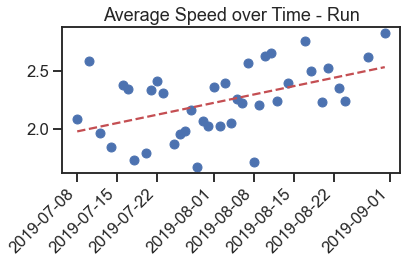

In [22]:
fig = plt.figure() #create overall container
ax2 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x2 = np.asarray(run_df.date)  #convert data to numpy array
y2 = np.asarray(run_df.ave_speed)
ax2.plot_date(x2, y2) #plot data points in scatter plot on ax1
ax2.set_title('Average Speed over Time - Run')
#ax1.set_ylim([0,5])
#add trend line
x4 = mdates.date2num(x2)
z=np.polyfit(x4,y2,1)
p=np.poly1d(z)
plt.plot(x2,p(x4),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()


From the above chart, I can decode from the positve gradient trendline that Chris' speed has improved with each day of training. 

Good job!

It looks like our client's runs have indeed got faster, on average, over time! This can be decoded from the positive gradient trendline (Best Fit Line) which shows that Chris' speed has improved with each day of training. 

For the next chart, I will like to analyse if distance, time taken affects his average speed. 

Encoding as follows: <br>
(1) distance he ran encoded by size of bubble <br>
(2) average speed can be read off the y-axis <br>
(3) time taken per color coding <br>
(4) day of week read off the x-axis

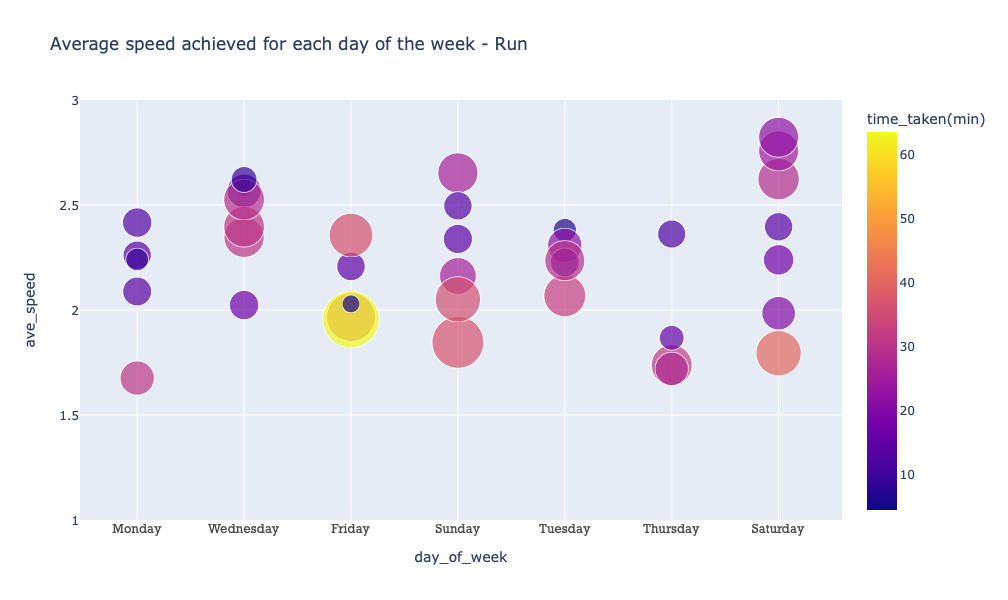

In [23]:
def px_bar_chart_top_run():

    fig = px.scatter(run_df,
            y = 'ave_speed',
            x = 'day_of_week', 
            labels = {
                "enhanced_speed": "max speed"
            },
             
            title = 'Average speed achieved for each day of the week - Run', 
            ## For me to determing if time taken has a part to play in his speed. Longer distance = more time and slower speed?
            color = 'time_taken(min)', 
            ## To differentiate top speeds of each day         
            size = 'distance', size_max = 40,         
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color  
            ##color_discrete_sequence=["#acc8d4"]            
            )

    ## To change range of the y axis, I wanted to magnify the effect, so I started off the y-axis with 4.0 as compared to 0.0
    fig.update_yaxes(range=[1, 3.0])

    fig.update_xaxes(tickangle=0, tickfont=dict(
                               family='Rockwell', 
                               color='#4a4a4a', 
                               size=12))

    ## To include text in the bars itself
    ## fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

    fig.show()
    
    return

px_bar_chart_top_run()

There are a couple of interesting insights from the above chart:
(1) There was a Friday run whereby Client clocked one of his longer runs - 7km and took the longest time - 36min. 
(2) He does longer runs over the weekends
(3) He does a lot of shorts on Monday, Tuesday and Thursday. 
(4) He seems to have more time on Wednesday to clock longer runs - 2 to 3km at a steady average speed of 2.5m/s.


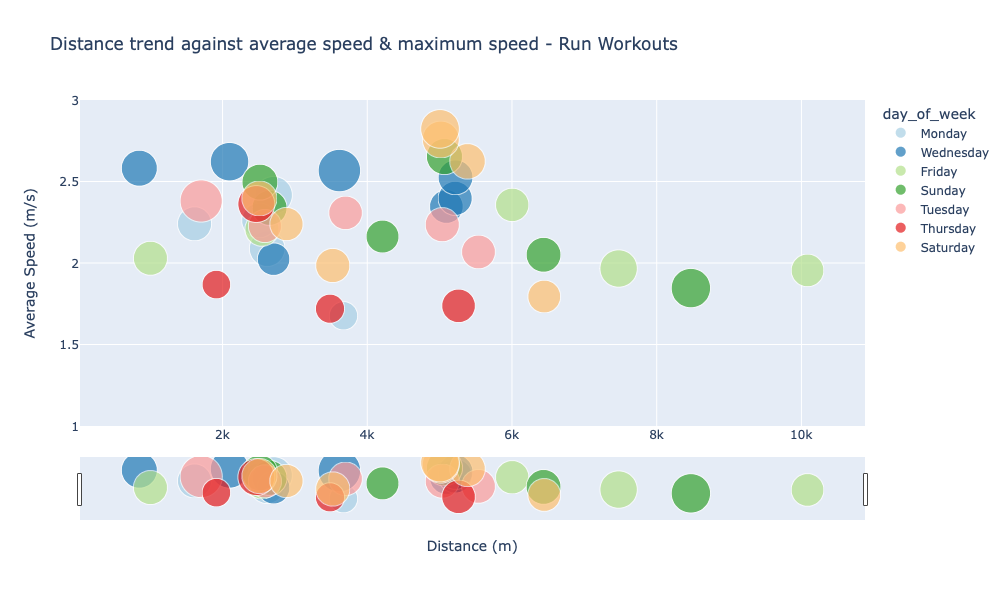

In [24]:
def scatter_plot_run():

    fig = px.scatter(run_df, x='distance', 
                             y = 'ave_speed',
                        labels = {
                        "ave_speed": "Average Speed (m/s)",
                        "distance": "Distance (m)"
                                }, 
                       color = 'day_of_week',
  
                       size = 'top_speed', size_max = 30,
                       title = 'Distance trend against average speed & maximum speed - Run Workouts', 
                       color_discrete_sequence = px.colors.colorbrewer.Paired, 
                       hover_name = 'day_of_week',
                    )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    fig.update_yaxes(range=[1, 3.0])
    
    fig.update_xaxes(rangeslider_visible=True,
                    
                    )
                    
                    
    fig.update_layout(showlegend=True)
    
    fig.show()
    
    return

scatter_plot_run()



The above chart and slider animation is to help the client understand day of the week which they achieve their best performance, and which distance he was running at when he achieved his highest average speeed. <br>

Via the above chart with animation, I can decode the 
(1) average speed, 
(2) top speed at each distance range for 
(3) different day of the week. 

Most of his top speeds for his run workouts are achieved over the weekends  - Saturday and Sunday. <br>


Client seems to like to run 5km distance. He clocked a total of 10 workouts in that range with his top average speed achieved in that range, you can infer from the screenshot at 5km range as follows:  

![5kdistance](picture1.png)


Another observation from the size of circle which decodes the top speed is that most of his top speeds are achieved on Wednesday. 

However it is also important to make sure client is exercising right. To do this, lets look at his heart rate during his run workout. 

But first, let us all agree on the ideal heart rate bpm he should be working within: 

<font color=green>Determing the ideal heart rate range:</font><br>

Client disclosed he is 44 years of age. 

When a person exercises, his heart should beat at a certain rate. This is called target heart rate. Here’s how to figure it out based on medical journal [hopkinsmedicine](https://www.hopkinsmedicine.org/diabetes/diabetes_education/patient_education_material/exercising_like_your_life_depends_on_it.pdf) <br>

Steps to calculate maximum and minimum heart rate for Client as follows: 

• Estimate your maximum heart rate. To do this, subtract your age from 220. A 44-year-old person would have an estimated maximum heart rate of 176 beats per minute (BPM).

• Multiply your maximum heart rate by 0.65. This is the low end of your target heart rate (176 x 0.65 = 114 BPM).

• Multiply your maximum heart rate by 0.80. This is the high end of your target heart rate (176 x 0.80 = 141 BPM).

• So, Client 44-year-old of age would have a target heart rate of 114 to 141 BPM.

![heartrate](heartrate.png)


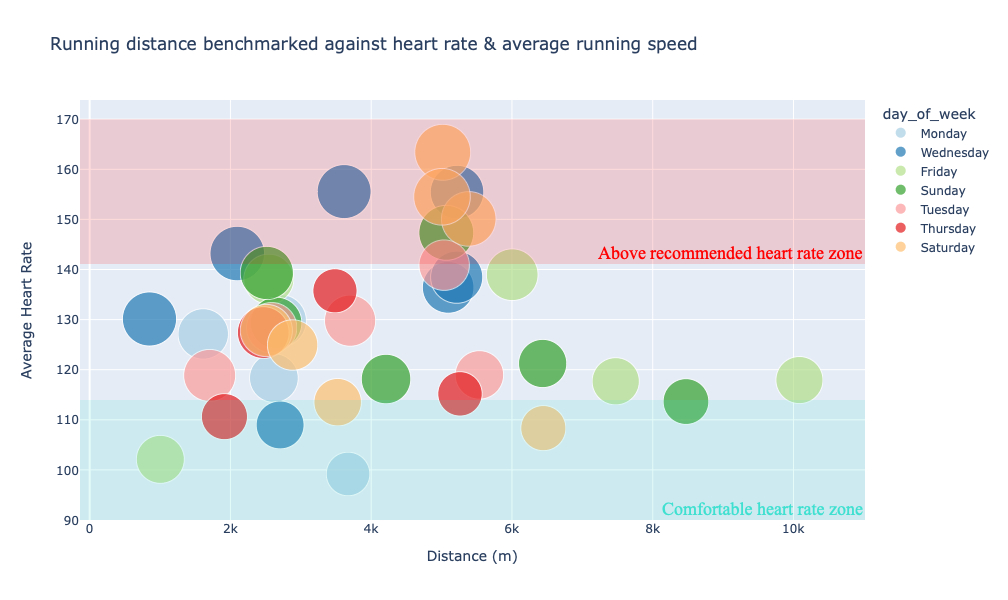

In [25]:
def scatter_plot_():

    fig = px.scatter(run_df, x='distance', 
                    y = 'HR',
                    labels = {
                        "HR": "Average Heart Rate",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'ave_speed', size_max = 40,
                   title = 'Running distance benchmarked against heart rate & average running speed',
                          
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    fig.add_hrect(y0=141, y1=170, line_width=0, fillcolor="red", opacity=0.14, 
                  annotation_text="Above recommended heart rate zone", 
                  annotation=dict(font_size=18, font_family="Times New Roman"),
                  annotation_font_color="red",
                  annotation_position="bottom right",                
                 )
    
    fig.add_hrect(y0=90, y1=114, line_width=0, fillcolor="turquoise", opacity=0.14, 
                  annotation_text="Comfortable heart rate zone", 
                  annotation=dict(font_size=18, font_family="Times New Roman"),
                  annotation_font_color="turquoise",
                  annotation_position="bottom right",                
                 )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_()

Based on the above charts and analysis performed, I can conclude the following 
(1) Saturday was the day he clocked the most distance. <br>
(2) Saturday was also the day that he achieved his highest average speed. <br>
(3) He is not a weekend warrior as our client is quite consistent in his training with run trainings well spread out throughout the week. <br>
(4) He pushes himself very hard during training on Saturdays. he may be running with a group of friends or students resulting in him pushing himself above the recommended maximum heart rate of 141 bpm. <br>   


It will be interesting to see the number of times his heart rate is above the acceptable range of 141, this will be presented using seaborn as follows:


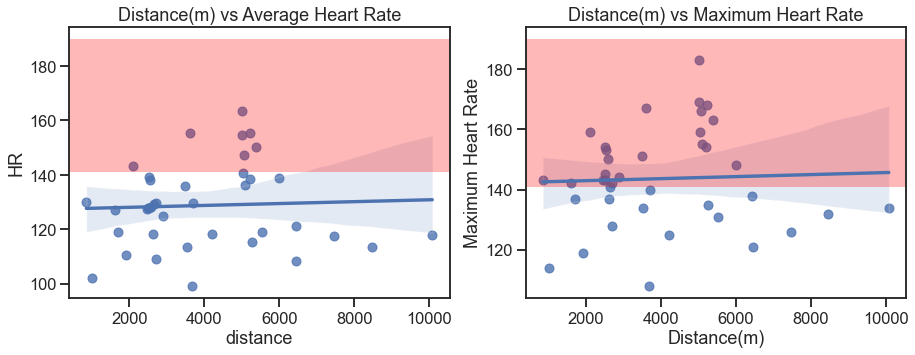

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))


sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[0], x="distance", y="HR", data=run_df).set(title='Distance(m) vs Average Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Average Heart Rate')

sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[1], x="distance", y="max_HR", data=run_df).set(title='Distance(m) vs Maximum Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Maximum Heart Rate')

for ax in axes:
#ax.fill_between(0,120, color="red", alpha=0.3)
    ax.axhspan(141, 190, color='red', alpha=0.15, lw=0)
    ax.axhspan(141, 190, color='red', alpha=0.15, lw=0)

We can decode from the seaborn chart that our client is really pushing himself during the run trainings. There are a fair number of points which are above and beyond the recommended heart beat range. 

*Reccomendation of run trainings to our client as follows based on above analysis:* 

(1) As our client performs somewhat better on Saturdays in terms of distance and speed, assuming that improving his running speed is our client's aim, he should consider having his run trainings on Saturdays. <br>

(2) If our client's aim is to train his fast twitching muscles, he should continue to do sprint workouts on Wednesdays as his top speed is usually acheived on Wednesdays. 

(3) During a couple of his workouts, his average heart rate is above the recommended range. Even though it is good to push yourself to your limit during workouts, it is important to ensure your heart is not overworking as it may lead to heart diseases and heart attack. Client should pay attention to his heart rate during strenuous activities. 

(4) Based on the number of data points within 3 months period, 39 in total, that average out to be 3 to 4 run workouts a week. 
All else equal with no medical condition disclosed, Client is considered fit and it is unusual for a person who has an active lifestyle to have such high heart rate during his run workouts. 

Although an increased heart rate is one aim of exercise, pushing the heart too far can be harmful. Client should exercise caution and watch out for chest tightness, difficulty breathing, and a relative inability to talk while running. If Client notices any of the above signs, he should slow down and concentrate on breathing steadily.

He should monitor and come back six months later for another round of assessment and review. 

## 2b. Cycle Workouts ##

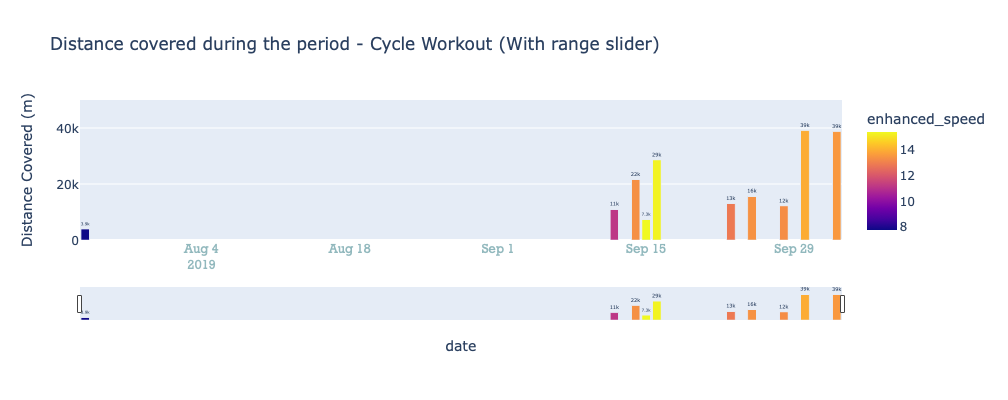

In [27]:
fig = px.bar(cycle_df,
            y = 'distance',
            x = 'date',  
            labels = {
                "distance": "Distance Covered (m)"
            },  
            title = 'Distance covered during the period - Cycle Workout (With range slider)', 
            # To decode average speed from chart
            color = 'enhanced_speed',
            text_auto='.2s', 
            height = 400, 
            width = 1000,
            ##barmode='relative',  
            ## color_discrete_Sequence changes the line color
            color_discrete_sequence=["#244747"]              
            )

fig.update_yaxes(range=[0.0, 50000.0])

## To change font type, size, color of axis 
fig.update_xaxes(tickangle=0, tickfont=dict(
                               family='Rockwell', 
                               color='#91b8bd', 
                               size=12)) 

# Added on a range slider to show, enables user to zoom into periods in he is interested in 
fig.update_xaxes(rangeslider_visible=True)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

Let us look at his Max Speed vs Distance, Average Speed vs Distance using seaborn:

Text(0.5, 1.0, 'Average Speed vs Distance - Cycle')

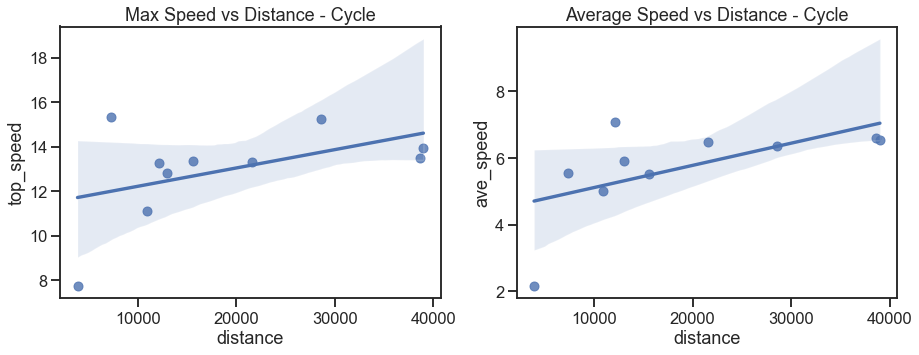

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[0], x='distance', y = 'top_speed', data = cycle_df).set_title("Max Speed vs Distance - Cycle")

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[1],x='distance', y = 'ave_speed', data = cycle_df).set_title("Average Speed vs Distance - Cycle")


Based on the data points we have for his cycle workout, I observed that as the distance increases, his speed increases. 

 - He probably was doing leisure cycle (the shorter distance) with his family and kids
 - The longer distance were done with his friends / cycling club resulting in higher speed for longer distance observed. 

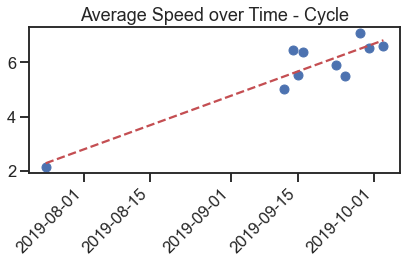

In [29]:
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x1 = np.asarray(cycle_df.date)  #convert data to numpy array
y1 = np.asarray(cycle_df.ave_speed)
ax1.plot_date(x1, y1) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time - Cycle')
#ax1.set_ylim([0,5])

#add trend line
x3 = mdates.date2num(x1)
z=np.polyfit(x3,y1,1)
p=np.poly1d(z)
plt.plot(x1,p(x3),'r--')
#format the figure and display

fig.autofmt_xdate(rotation=45)
fig.tight_layout()

It looks like our client's cycle remained somewhat consistent at around 6.5 m /s during the period under review.

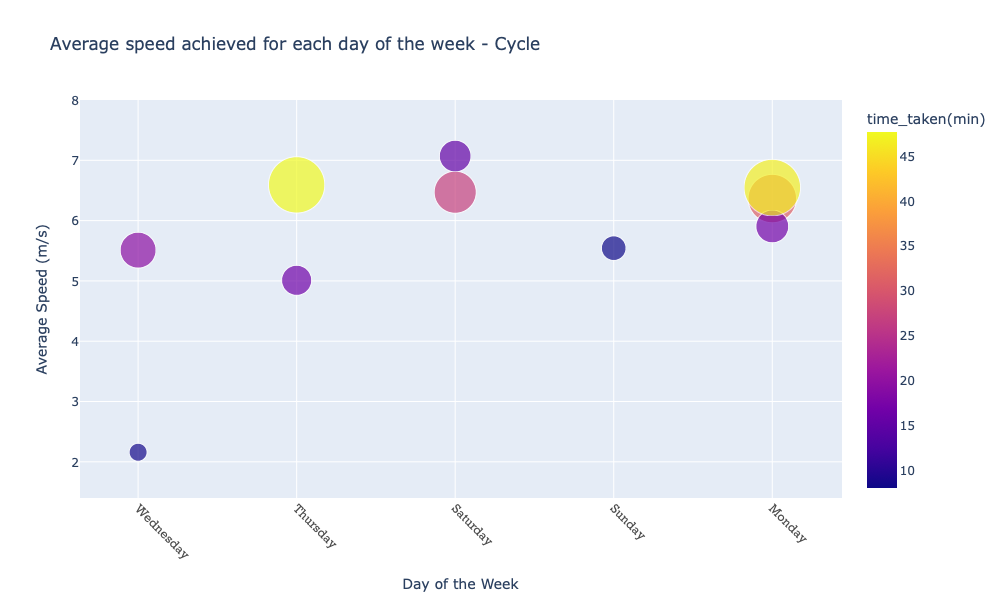

In [30]:
def px_bar_chart_top_cycle():

    fig = px.scatter(cycle_df,
            y = 'ave_speed',
            x = 'day_of_week', 
            labels = {
                "ave_speed": "Average Speed (m/s)",
                "day_of_week": "Day of the Week"
                            },
             
            title = 'Average speed achieved for each day of the week - Cycle', 
            color = 'time_taken(min)', 
            ## Using size of circle to indicate top speed for the day         
            size = 'distance', size_max = 40,         
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color  
            ##color_discrete_sequence=["#acc8d4"]            
            )

    ## To change range of the y axis, I wanted to magnify the effect, so I started off the y-axis with 4.0 as compared to 0.0
    fig.update_yaxes(range=[1.4, 8.0])

    fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#4a4a4a', 
                               size=12))

    ## To include text in the bars itself
    ## fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

    fig.show()
    
    return

px_bar_chart_top_cycle()

From the above chart, it is quite clear that Client did his longest ride (both in time and distance) on Monday and Thursday. 

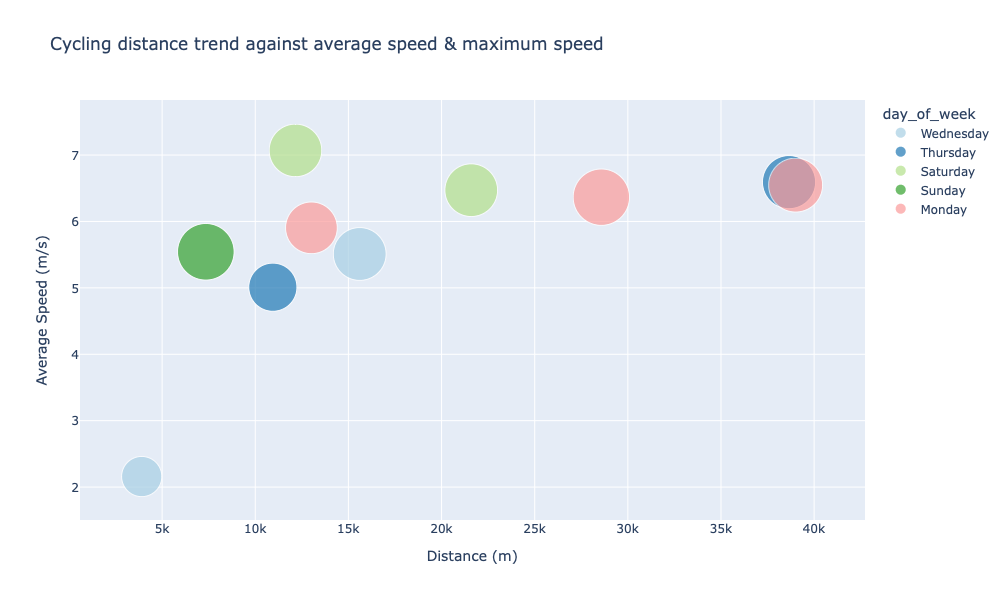

In [31]:
def scatter_plot_():

    fig = px.scatter(cycle_df, x='distance', 
                    y = 'ave_speed',
                    labels = {
                        "ave_speed": "Average Speed (m/s)",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'top_speed', size_max = 40,
                   title = 'Cycling distance trend against average speed & maximum speed', 
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_()

From the above chart we can decode that Client likes to cycle on Mondays. 

Both the (1) highest frequency and (2) highest average speed were all clocked on Monday.

The furthest distance travelled by Client was on Monday and Thursday. It seems that he likes to clock his long distance cycling training on Mondays as two out three of his longest distance cycled were completed on Monday. 

It can be decoded from the above chart that his highest average speed was clocked on a Saturday. This finding is consistent with his run workouts whereby his fastest average speed were all clocked on Saturdays. 

From the chart, it can be decoded that his highest cycling speed was clocked on Sunday with top speed of 15.3 m/s. 


Again I will like to find out how his heart is faring during these cycling workouts. 

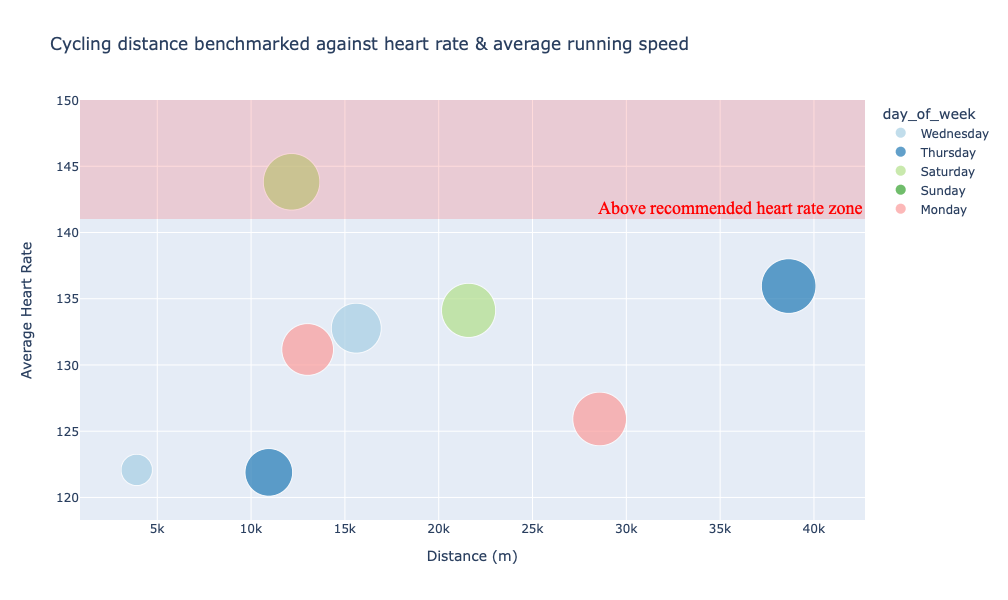

In [32]:
def scatter_plot_cycle():

    fig = px.scatter(cycle_df, x='distance', 
                    y = 'HR',
                    labels = {
                        "HR": "Average Heart Rate",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'ave_speed', size_max = 40,
                   title = 'Cycling distance benchmarked against heart rate & average running speed', 
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    ## Adding shaded area
    fig.add_hrect(y0=141, y1=150, line_width=0, fillcolor="red", opacity=0.14, 
                  annotation_text="Above recommended heart rate zone", 
                  annotation=dict(font_size=18, font_family="Times New Roman"),
                  annotation_font_color="red",
                  annotation_position="bottom right",
                 
                 )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_cycle()

From the above chart, we can decode that out of 10 cycling trips, only his Saturday ride had his heart pounding at 143 bpm, slightly above his comfortable range. This is one off out of his 10 cycling trips. He may be getting out of his comfort zone by joining a peleton ride or he was being chased after by a wild dog resulting in the higher than normal heart rate. 

From the above chart we can decode that Client puts in more effort during his Saturday's ride. Depicting this with the earlier 
'Cycling distance trend against average speed & maximum speed and heart rate' chart, it seems that Saturday is the day he clocks his fastest ride together and his average heart rate is at its highest.

let us complement this analysis with some seaborn charts as follows:


Text(0, 0.5, 'Maximum Heart Rate')

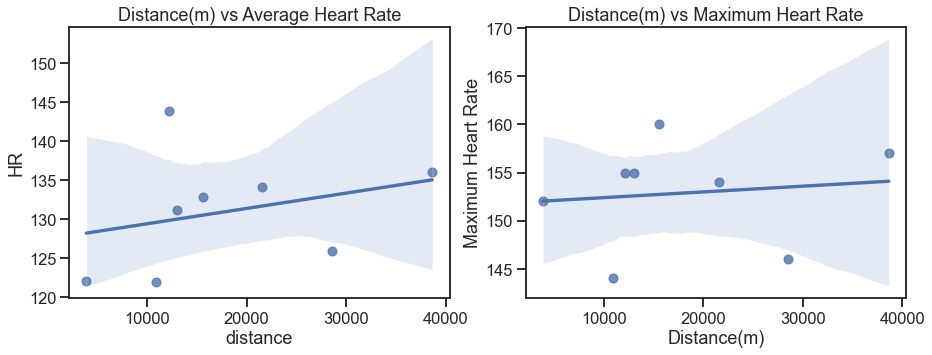

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))


sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[0], x="distance", y="HR", data=cycle_df).set(title='Distance(m) vs Average Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Average Heart Rate')

sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[1], x="distance", y="max_HR", data=cycle_df).set(title='Distance(m) vs Maximum Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Maximum Heart Rate')
    

It seems that client is pushing himself beyond the comfortable heart rate range.

Vigorous exercise which he was performing can make him a better athlete. But, it can also raise the risks of heart attack and injury.

Recommendation for client is to train more often, build up more endurance in order for his heart range to be kept in a comfortable range.  

## 3. Power, Cadence, Heart rate Analysis

**Here we will load just power data**<br>

Here we only include the ones with a power field and combine them all together into one giant data frame <br>


In [34]:
clean_power_df = uncleanfit_df['Power'].notna()

power_df = uncleanfit_df[clean_power_df]
power_df['time'] = power_df['distance']/power_df['enhanced_speed']
power_df['time'] = power_df['time'] / 60

power_df.describe()
#power_df.to_csv('power.csv')

Air Power       Cadence    Form Power   Ground Time  \
count  17842.000000  17847.000000  17842.000000  17847.000000   
mean       1.872100     77.726565     99.485932    325.934107   
std        2.777476      9.202077     13.866222     71.773687   
min        0.000000      0.000000      0.000000      0.000000   
25%        1.000000     78.000000     97.000000    308.000000   
50%        1.000000     79.000000    101.000000    326.000000   
75%        2.000000     80.000000    105.000000    340.000000   
max       48.000000     88.000000    125.000000   1732.000000   

       Leg Spring Stiffness         Power  Vertical Oscillation  altitude  \
count          17842.000000  17847.000000          17847.000000       0.0   
mean              13.138571    301.459797              6.458074       NaN   
std                2.039567     48.540552              1.135497       NaN   
min                0.000000      0.000000              0.000000       NaN   
25%               13.000000    283.000000              6.125000       NaN   
50%               13.375000    303.000000              6.500000       NaN   
75%               13.750000    326.000000              7.000000       NaN   
max               16.875000    462.000000             12.500000       NaN   

            cadence      distance  ...  fractional_cadence    heart_rate  \
count  17847.000000  17847.000000  ...             17847.0  17847.000000   
mean      77.753852   2378.922603  ...                 0.0    146.439682   
std        9.117085   1519.322862  ...                 0.0     14.223825   
min        0.000000      0.000000  ...                 0.0     70.000000   
25%       78.000000   1093.910000  ...                 0.0    138.000000   
50%       79.000000   2190.200000  ...                 0.0    147.000000   
75%       80.000000   3658.525000  ...                 0.0    158.000000   
max       88.000000   6003.430000  ...                 0.0    183.000000   

       position_lat  position_long  speed  unknown_87    unknown_88  \
count  1.781600e+04   1.781600e+04    0.0     17847.0  17847.000000   
mean   5.045454e+08  -9.998434e+08    NaN         0.0    299.170729   
std    7.907158e+04   1.975164e+06    NaN         0.0     12.852073   
min    5.043676e+08  -1.005696e+09    NaN         0.0    100.000000   
25%    5.044784e+08  -9.994046e+08    NaN         0.0    300.000000   
50%    5.045618e+08  -9.993498e+08    NaN         0.0    300.000000   
75%    5.046168e+08  -9.990445e+08    NaN         0.0    300.000000   
max    5.046772e+08  -9.985188e+08    NaN         0.0    300.000000   

         unknown_90   distance_km          time  
count  13521.000000  17847.000000  1.784300e+04  
mean      -1.144812      2.378923           inf  
std        2.993341      1.519323           NaN  
min      -11.000000      0.000000  0.000000e+00  
25%       -3.000000      1.093910  7.261789e+00  
50%       -1.000000      2.190200  1.486485e+01  
75%        1.000000      3.658525  2.428277e+01  
max        6.000000      6.003430           inf  

[8 rows x 22 columns]

In [35]:
print ("Number of datapoints :", len(power_df['Power']))

Number of datapoints : 17847


The charts as follows shows the (1) Power, (2) Heart Rate, (3) Cadence trending against time.  

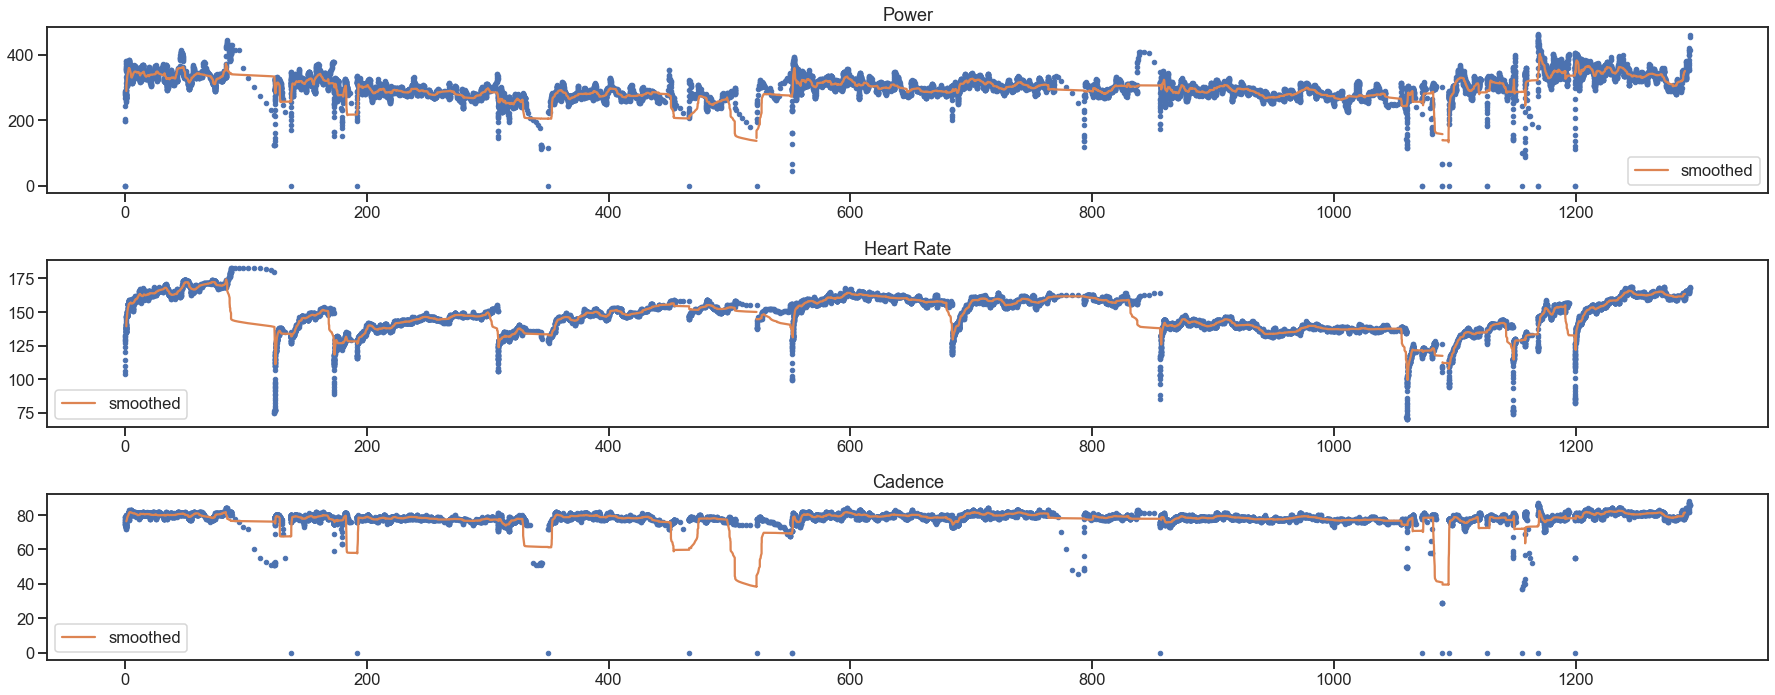

In [36]:
power_df['time'] = np.cumsum(np.clip(power_df['time'].diff(), 0, 5)) # no more than a 5 second gap between metrics

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25, 10))


ax1.plot(power_df['time'], power_df['Power'], '.')
ax1.plot(power_df['time'], power_df['Power'].rolling(100, center=True).mean(), '-', label='smoothed')
ax1.legend()
ax1.set_title('Power')

ax2.plot(power_df['time'], power_df['heart_rate'], '.')
ax2.plot(power_df['time'], power_df['heart_rate'].rolling(100, center=True).mean(), '-', label='smoothed')
ax2.legend()
ax2.set_title('Heart Rate')

ax3.plot(power_df['time'], power_df['cadence'], '.')
ax3.plot(power_df['time'], power_df['cadence'].rolling(100, center=True).mean(), '-', label='smoothed')
ax3.legend()
ax3.set_title('Cadence')

fig.tight_layout()

<AxesSubplot:xlabel='Power', ylabel='heart_rate'>

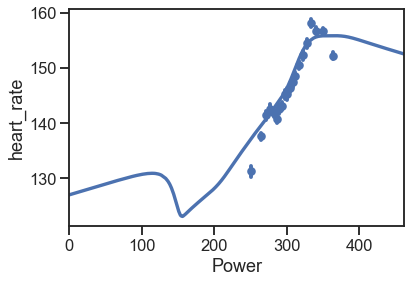

In [37]:
sns.regplot(x='Power', y='heart_rate', data=power_df, x_bins=20, lowess=True, truncate=False)

From the above chart we can decode that the mean power produced was 300 with our client's heart rate averaging at 150. 

<AxesSubplot:xlabel='cadence'>

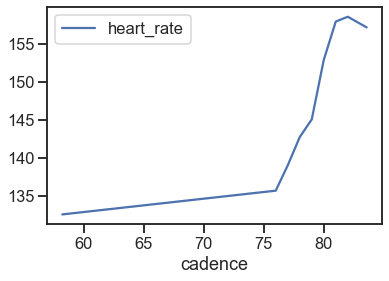

In [38]:
power_df.groupby(pd.qcut(power_df['cadence'], 20, duplicates='drop')).agg({'cadence': 'mean', 'heart_rate': 'mean'}).plot('cadence', 'heart_rate')

The above chart tells the Client that when he moves from cadence of 75 to 80, significant spike was noted for his heart rate from 135 to 155. 

<AxesSubplot:xlabel='cadence', ylabel='Power'>

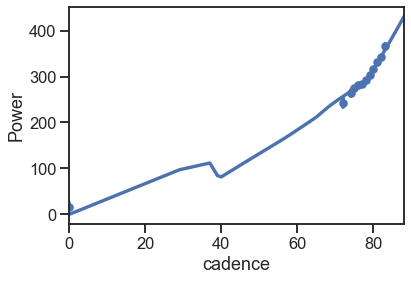

In [39]:
sns.regplot(x='cadence', y='Power', data=power_df, x_bins=100, lowess=True, label=True, truncate=False)

Average power of 400 generated with cadence of 80

<AxesSubplot:xlabel='cadence'>

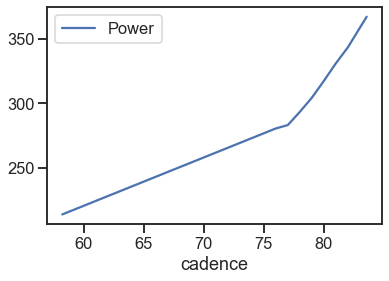

In [40]:
power_df.groupby(pd.qcut(power_df['cadence'], 20, duplicates='drop')).agg({'cadence': 'mean', 'Power': 'mean'}).plot('cadence', 'Power')

From this chart, we can depict that the gradient becomes steeper after cadence of 75. This means Client produces more power after cadence of 75. 

The next few charts as follows shows the correlation between heart rate and power 

Text(0, 0.5, 'heart rate')

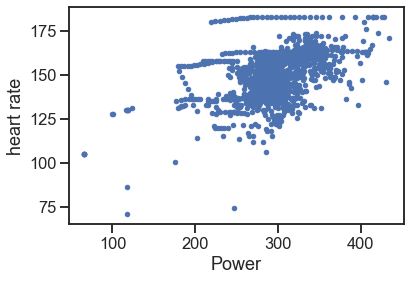

In [41]:
from scipy.interpolate import interp1d
power_vec = power_df[['time', 'Power', 'heart_rate']].query('Power>0').dropna().values
lin_time = np.arange(power_vec[:, 0].min(), power_vec[:, 0].max(), 1)
power_curve = interp1d(power_vec[:, 0], power_vec[:, 1])(lin_time)
hr_curve = interp1d(power_vec[:, 0], power_vec[:, 2])(lin_time)

power_vec[:, 0].min(), power_vec[:, 0].max()

plt.plot(power_curve, hr_curve, '.')
plt.xlabel('Power')
plt.ylabel('heart rate')

From the above chart, we can depict that at heart beat range between 125 and 175, Client has generated power between 300 to 400. 


<AxesSubplot:xlabel='t'>

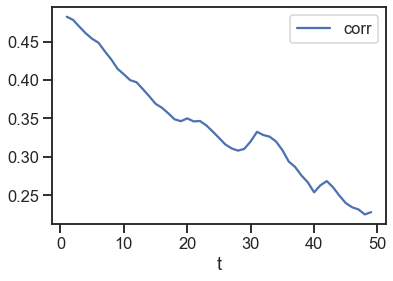

In [42]:
corr_df = pd.DataFrame([{'t': i, 
               'corr': np.corrcoef(power_curve[:-i], 
                                   hr_curve[i:])[0, 1]}
 for i in range(1, 50)])
corr_df.plot('t', 'corr')   

HR lags power by 1 seconds


Text(0, 0.5, 'HR')

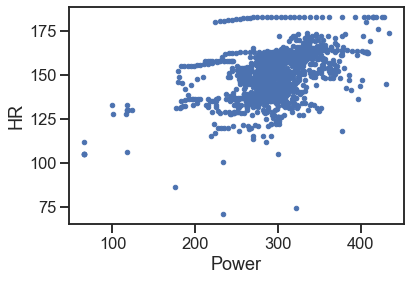

In [43]:
t_offset = corr_df['t'].values[np.argmax(corr_df['corr'].values)]
print('HR lags power by {} seconds'.format(t_offset))
plt.plot(power_curve[:-t_offset],
         hr_curve[t_offset:], 
         '.'
        )
plt.xlabel('Power')
plt.ylabel('HR')

I am happy to tell Client that he is healthy, based on the correlation calculation, his heart rate lags power by only 1 second. 

The above chart is a measure of Client's body response to input resulting in the power (output), what the effort is amounting to in the real world.  Most of the points are in the Heart Rate of 150 BPM / Power of 300 Region, we can interpret this as when Power of 300 is generated by the Client, his heart rate is working at 150 BPM.

## Heart rate analysis

I will next use the Scatterplot matrix, known acronymically as SPLOM, determine the correlation (if any) between a series of variables and more more importantly, what causes the high heart rate of Client. These scatterplots are then organized into a matrix, making it easy to look at all the potential correlations in one place. SPLOM is a effective way of examining any correlations between the variables 

(1) Average Speed
(2) Cadence
(3) Distance
(4) Power, 
(5) Form Power, 
(6) Time Taken (min) 

and how they co-relate to higher than normal heart beat, calculated to be above 141 BPM.


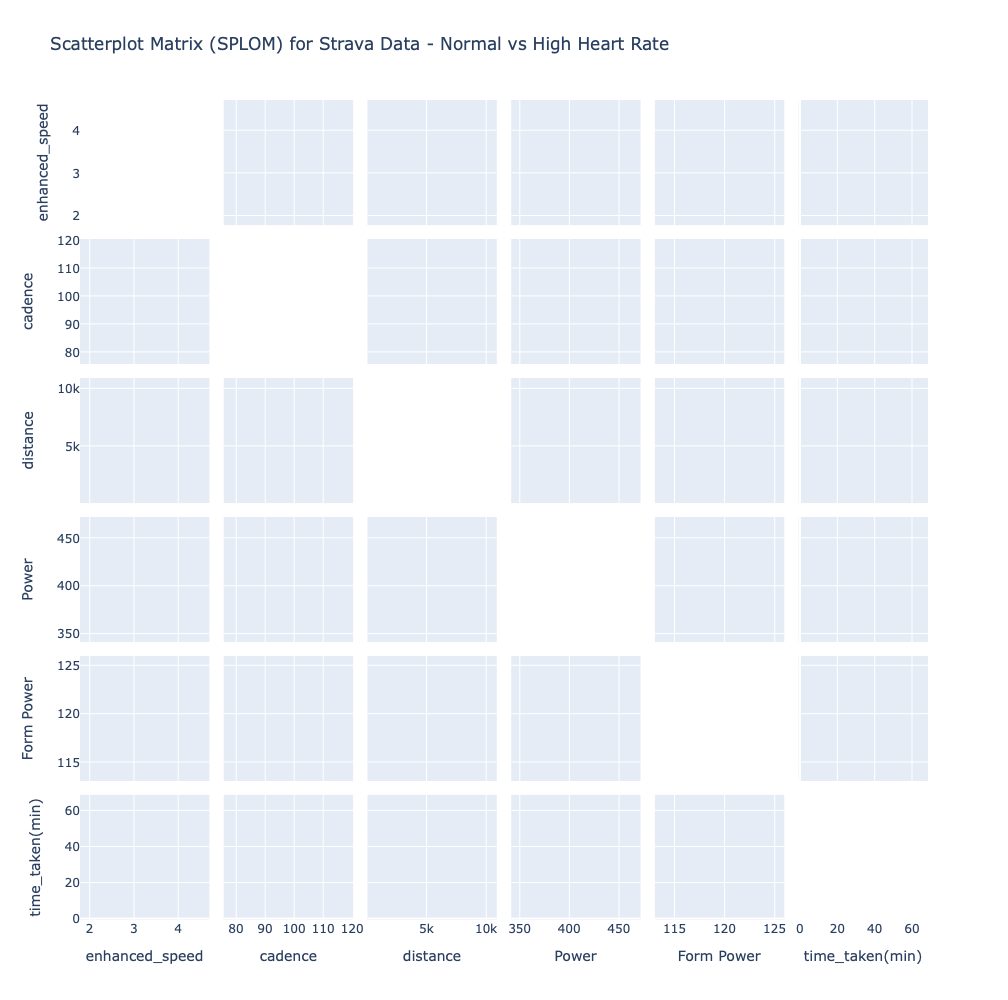

In [44]:
textd = ['High Heart Rate' if cl>141 else 'Normal Heart Rate' for cl in run_df['HR']]

fig = go.Figure(data=go.Splom(
                  # dimensions I will like compare  
                  dimensions=[dict(label='enhanced_speed', values=run_df['enhanced_speed']),
                              dict(label='cadence', values=run_df['cadence']),
                              dict(label='distance', values=run_df['distance']),
                              dict(label='Power', values=run_df['Power']),
                              dict(label='Form Power', values=run_df['Form Power']),
                              dict(label='time_taken(min)', values=run_df['time_taken(min)'])],

                  marker = dict(color=run_df['HR'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=textd,
                      
                  diagonal=dict(visible=False)))

title = "Scatterplot Matrix (SPLOM) for Strava Data - Normal vs High Heart Rate"                    
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()


Blue dots indicate normal heart rate, Red dots indicate higher than normal average heart rate (Above 141 BPM). I interpret the following factors which correlates to Client's higher than normal heart rate >141 BPM:

(1) High power and time taken  <br>
(1) High power and form power correlates to higher heart rate <br>
(3) High average speed and long distance <br>
(4) Time taken and long distance <br>



# Conclusion

Based on analysis performed, I can tell from the three months data review period that the client is a healhty individual. He keeps himself healthy and clocks in 3 to 4 workouts a week. 

![daysaweek](picture2.png)


*Run Workouts* - <br>

 ![heart](picture4.png)
 - Most of his top speeds for his run workouts are achieved over the weekends - Saturday and Sunday. <br>
 - Most of his top speeds are achieved on Wednesday.
 - He is not a weekend warrior as our client is quite consistent in his training with run trainings well spread out throughout the week.  
 - He pushes himself very hard during training on Saturdays. His heart rate for a couple of his run workouts on Saturdays are higher than the recommended threshold of 141. 
 
 ![heart](picture3.png)
 
 

*Cycle Workouts* - <br>
 - we can decode that Client likes to cycle on Mondays. <br>
 - Both the (1) highest frequency and (2) highest average speed were all clocked on Monday.
 - Out of ten rides, during one his ride his average BPM was higher than the recommended threshold of 141. 
 
Based on the correlation calculation between Heart Rate and Power, His Heart Rate lags Power by 1 sec. How this can be interpreted is that he is an efficient athlete, with every input of energy by his body, it takes 1 sec for the output. When client's heart is working at 150 BPM, Power of 300 was generated. 

In summary, recommendation of trainings to our client as follows based on above analysis:

(1) As our client performs somewhat better on Saturdays in terms of distance and speed, assuming that improving his running speed is our client's aim, he should consider having his run trainings on Saturdays. 

(2) If our client's aim is to train his fast twitching muscles, he should continue to do sprint workouts on Wednesdays as his top speed is usually acheived on Wednesdays.

(3) During a couple of his workouts, his average heart rate is above the recommended range. Even though it is good to push himself to his limit during workouts, it is important to ensure his heart is not overworking as it may lead to heart diseases and heart attack. Client should pay attention to his heart rate during strenuous activities.



---
**Author**: Steven Ong

Source code for tutorial can be found in [Github](https://github.com/steven-ong/Strava/blob/7220d1fba67019c59084a79a8f8a0cae82083365/Week%204%20strava-5.ipynb)

**Rule 9: Design your notebooks to be read, run, and explored.** <br>
Notebooks should capture your entire process and be easy to read. The notebook has been uploaded to GitHub for others to access. 

---